In [1]:
%pylab inline

import os, paper_style

Populating the interactive namespace from numpy and matplotlib


In [2]:
idir = os.path.expandvars("$master/notebooks/data/G05Indexes")
odir = os.path.expandvars("$HOME/Documents/Publications/photofit_near_paper")

Vwlages = [
    {
        "tau0": loadtxt("{}/m{}2.7lsindx_sed".format(idir,i))[:,0],
        "tau2": log10(loadtxt("{}/tau2_m{}2.w_age".format(idir,i))[:,5]),
        "tau5": log10(loadtxt("{}/tau5_m{}2.w_age".format(idir,i))[:,5])
    }  for i in xrange(3,8)
]

lsindx6 = [
    {
        "tau0": loadtxt("{}/m{}2.7lsindx_sed".format(idir,i)),
        "tau2": loadtxt("{}/tau2_m{}2.7lsindx_sed".format(idir,i)),
        "tau5": loadtxt("{}/tau5_m{}2.7lsindx_sed".format(idir,i))
    }  for i in xrange(3,8)
]
lsindx7 = [
    {
        "tau0": loadtxt("{}/m{}2.6lsindx_sed".format(idir,i)),
        "tau2": loadtxt("{}/tau2_m{}2.6lsindx_sed".format(idir,i)),
        "tau5": loadtxt("{}/tau5_m{}2.6lsindx_sed".format(idir,i))
    }  for i in xrange(3,8)
]
ABcolor = [
    {
        "tau0": loadtxt("{}/m{}2.1ABmag".format(idir,i)),
        "tau2": loadtxt("{}/tau2_m{}2.1ABmag".format(idir,i)),
        "tau5": loadtxt("{}/tau5_m{}2.1ABmag".format(idir,i))
    }  for i in xrange(3,8)
]

Mg2Fe = lambda Mg2, Fe4531, Fe5015: 0.6*Mg2 + 0.4*log10(abs(Fe4531+Fe5015))
MgFep = lambda Mgb, Fe5270, Fe5335: sqrt(abs(Mgb*(0.72*Fe5270 + 0.28*Fe5335)))

kw_indx = [
    r"\bf \log{t/\text{yr}}",
    r"\bf D$4000$",
    r"\bf H$\beta$",
    r"\bf H$\delta_A$+H$\gamma_A$",
    r"\bf [Mg${}_2$Fe]",
    r"\bf [MgFe]'",
    r"\bf u-r"
]
kw_mets = r"\bf0.02 \bf0.2 \bf0.4 \bf1.0 \bf2.5Z$\odot$".split()
idx_tau0, col_tau0 = {}, {}
idx_tau2, col_tau2 = {}, {}
idx_tau5, col_tau5 = {}, {}
for i in xrange(len(lsindx6)):
    idx_tau0[kw_mets[i]] = {
        kw_indx[0]: Vwlages[i]["tau0"],
        kw_indx[1]: lsindx7[i]["tau0"][:,13],
        kw_indx[2]: lsindx6[i]["tau0"][:,9],
        kw_indx[3]: lsindx7[i]["tau0"][:,9] + lsindx7[i]["tau0"][:,10],
        kw_indx[4]: Mg2Fe(lsindx6[i]["tau0"][:,12],lsindx6[i]["tau0"][:,7],lsindx6[i]["tau0"][:,10]),
        kw_indx[5]: MgFep(lsindx6[i]["tau0"][:,13],lsindx7[i]["tau0"][:,1],lsindx7[i]["tau0"][:,2]),
        kw_indx[6]: ABcolor[i]["tau0"][:,3]+ABcolor[i]["tau0"][:,4]
    }
    it = [argmin(abs(ABcolor[i]["tau0"][:,3]+ABcolor[i]["tau0"][:,4]-1.47)), argmin(abs(ABcolor[i]["tau0"][:,3]+ABcolor[i]["tau0"][:,4]-1.81))]
    col_tau0[kw_mets[i]] = {
        kw_indx[0]: Vwlages[i]["tau0"][it],
        kw_indx[1]: lsindx7[i]["tau0"][it,13],
        kw_indx[2]: lsindx6[i]["tau0"][it,9],
        kw_indx[3]: lsindx7[i]["tau0"][it,9] + lsindx7[i]["tau0"][it,10],
        kw_indx[4]: Mg2Fe(lsindx6[i]["tau0"][it,12],lsindx6[i]["tau0"][it,7],lsindx6[i]["tau0"][it,10]),
        kw_indx[5]: MgFep(lsindx6[i]["tau0"][it,13],lsindx7[i]["tau0"][it,1],lsindx7[i]["tau0"][it,2]),
        kw_indx[6]: ABcolor[i]["tau0"][it,3]+ABcolor[i]["tau0"][it,4]
    }
    idx_tau2[kw_mets[i]] = {
        kw_indx[0]: Vwlages[i]["tau2"],
        kw_indx[1]: lsindx7[i]["tau2"][:,13],
        kw_indx[2]: lsindx6[i]["tau2"][:,9],
        kw_indx[3]: lsindx7[i]["tau2"][:,9] + lsindx7[i]["tau2"][:,10],
        kw_indx[4]: Mg2Fe(lsindx6[i]["tau2"][:,12],lsindx6[i]["tau2"][:,7],lsindx6[i]["tau2"][:,10]),
        kw_indx[5]: MgFep(lsindx6[i]["tau2"][:,13],lsindx7[i]["tau2"][:,1],lsindx7[i]["tau2"][:,2]),
        kw_indx[6]: ABcolor[i]["tau2"][:,3]+ABcolor[i]["tau2"][:,4]
    }
    it = [argmin(abs(ABcolor[i]["tau2"][:,3]+ABcolor[i]["tau2"][:,4]-1.47)), argmin(abs(ABcolor[i]["tau2"][:,3]+ABcolor[i]["tau2"][:,4]-1.81))]
    col_tau2[kw_mets[i]] = {
        kw_indx[0]: Vwlages[i]["tau2"][it],
        kw_indx[1]: lsindx7[i]["tau2"][it,13],
        kw_indx[2]: lsindx6[i]["tau2"][it,9],
        kw_indx[3]: lsindx7[i]["tau2"][it,9] + lsindx7[i]["tau2"][it,10],
        kw_indx[4]: Mg2Fe(lsindx6[i]["tau2"][it,12],lsindx6[i]["tau2"][it,7],lsindx6[i]["tau2"][it,10]),
        kw_indx[5]: MgFep(lsindx6[i]["tau2"][it,13],lsindx7[i]["tau2"][it,1],lsindx7[i]["tau2"][it,2]),
        kw_indx[6]: ABcolor[i]["tau2"][it,3]+ABcolor[i]["tau2"][it,4]
    }
    idx_tau5[kw_mets[i]] = {
        kw_indx[0]: Vwlages[i]["tau5"],
        kw_indx[1]: lsindx7[i]["tau5"][:,13],
        kw_indx[2]: lsindx6[i]["tau5"][:,9],
        kw_indx[3]: lsindx7[i]["tau5"][:,9] + lsindx7[i]["tau5"][:,10],
        kw_indx[4]: Mg2Fe(lsindx6[i]["tau5"][:,12],lsindx6[i]["tau5"][:,7],lsindx6[i]["tau5"][:,10]),
        kw_indx[5]: MgFep(lsindx6[i]["tau5"][:,13],lsindx7[i]["tau5"][:,1],lsindx7[i]["tau5"][:,2]),
        kw_indx[6]: ABcolor[i]["tau5"][:,3]+ABcolor[i]["tau5"][:,4]
    }
    it = [argmin(abs(ABcolor[i]["tau5"][:,3]+ABcolor[i]["tau5"][:,4]-1.47)), argmin(abs(ABcolor[i]["tau5"][:,3]+ABcolor[i]["tau5"][:,4]-1.81))]
    col_tau5[kw_mets[i]] = {
        kw_indx[0]: Vwlages[i]["tau5"][it],
        kw_indx[1]: lsindx7[i]["tau5"][it,13],
        kw_indx[2]: lsindx6[i]["tau5"][it,9],
        kw_indx[3]: lsindx7[i]["tau5"][it,9] + lsindx7[i]["tau5"][it,10],
        kw_indx[4]: Mg2Fe(lsindx6[i]["tau5"][it,12],lsindx6[i]["tau5"][it,7],lsindx6[i]["tau5"][it,10]),
        kw_indx[5]: MgFep(lsindx6[i]["tau5"][it,13],lsindx7[i]["tau5"][it,1],lsindx7[i]["tau5"][it,2]),
        kw_indx[6]: ABcolor[i]["tau5"][it,3]+ABcolor[i]["tau5"][it,4]
    }

kw_modl = sorted(idx_tau0.keys())

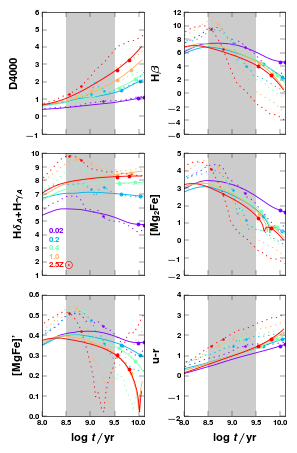

In [3]:
cl_modl = cm.rainbow(linspace(0,1,len(kw_modl)))

fig, axs = subplots(3, 2, sharex=True, figsize=(3.3,5))
xlim(8.0,10.1)

axs = axs.ravel()
for i in xrange(axs.size):
    for j, modl in enumerate(kw_modl):
        axs[i].plot(idx_tau0[modl][kw_indx[0]], idx_tau0[modl][kw_indx[i+1]], ":", color=cl_modl[j], lw=0.7)
        axs[i].plot(col_tau0[modl][kw_indx[0]], col_tau0[modl][kw_indx[i+1]], "o", ms=2, mew=0, color=cl_modl[j])
        axs[i].plot(idx_tau5[modl][kw_indx[0]], idx_tau5[modl][kw_indx[i+1]], "-", color=cl_modl[j], lw=0.7)
        axs[i].plot(col_tau5[modl][kw_indx[0]], col_tau5[modl][kw_indx[i+1]], "o", ms=3, mew=0, color=cl_modl[j])
        axs[i].axvspan(8.5, 9.5, lw=0, fc="none", hatch=15*"/", color="0.8")
        if i==2:
            axs[i].text(0.07, 0.35-j*0.07, kw_mets[j], color=cl_modl[j], fontsize="x-small", transform=axs[i].transAxes)
        
    if axs[i].is_last_row(): axs[i].set_xlabel(kw_indx[0])
    axs[i].set_ylabel(kw_indx[i+1])

fig.tight_layout()
fig.subplots_adjust(wspace=0.4)

fig.savefig("{}/g05_indexes".format(odir))